In [1]:
%pylab inline
import numpy as np
np.set_printoptions(precision=6, linewidth=110)

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import pycbc.filter
import pycbc.types
import pycbc.psd

Populating the interactive namespace from numpy and matplotlib



In [2]:
import matplotlib
matplotlib.__version__

'2.2.2'

In [3]:
sys.path.insert(0, '../../src')

import waveform as wave
import waveformset as ws
import surrogate
import diagnostics
import plotparams

import imp
imp.reload(wave)
imp.reload(ws)
imp.reload(surrogate)
imp.reload(diagnostics)
imp.reload(plotparams)

import constants
imp.reload(constants)
from constants import *

# Histogram of errors

In [4]:
# Load errors data
errors_lhd = np.loadtxt('../../data/TEOBv4QM_20hz/errors_test_set2_lhd.txt')
errors_uncsamp = np.loadtxt('../../data/TEOBv4QM_20hz/errors_test_set2_lhd_uncsamp.txt')
errors_rand = np.loadtxt('../../data/TEOBv4QM_20hz/errors_test_set2_lhd_uncsamp_rand.txt')
errors_uniformxi = np.loadtxt('../../data/TEOBv4QM_20hz/errors_test_set2_lhd_uncsamp_rand_uniformxi.txt')

In [10]:
def max_error_row(errors_array, j):
    imax = np.argmax(errors_array[:, j])
    return errors_array[imax]

j = 7
print max_error_row(errors_lhd, j)
print max_error_row(errors_uncsamp, j)
print max_error_row(errors_rand, j)
print max_error_row(errors_uniformxi, j)

[ 3.734683e-01 -1.504915e-01  3.482337e-01  4.135736e+00  2.306321e+03  7.069778e+00  1.075748e-01
  2.458576e+01  1.598161e-02  7.018618e-03]
[ 8.576437e-01  3.465780e-01 -2.796804e-02  1.034709e+02  3.097195e+03  1.226228e+00  1.159361e-01
  5.139078e+00  9.199694e-04  1.894286e-02]
[4.608391e-01 1.802377e-01 3.420172e-01 4.180020e+01 2.005161e+02 9.271673e-01 1.527953e-01 3.275301e+00
 4.060274e-04 2.969948e-02]
[ 4.758351e-01  4.358987e-01 -2.341710e-01  1.973837e+02  4.093865e+03  3.941021e-01  3.447714e-01
  1.425101e+00  4.085173e-04  4.428605e-02]


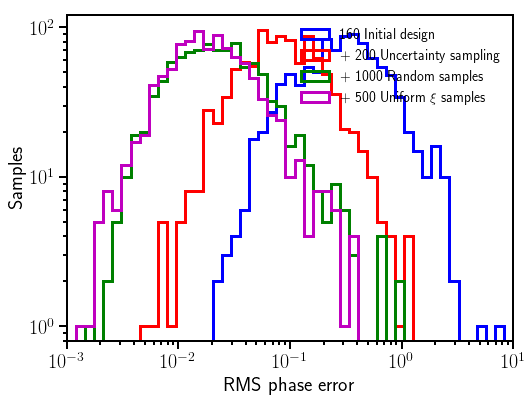

In [37]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.hist(errors_lhd[:, 5], bins=np.logspace(-3, 1, 50), histtype='step', 
          ls='-', lw=3, color='blue', alpha=1.0, label=r'160 Initial design')
ax.hist(errors_uncsamp[:, 5], bins=np.logspace(-3, 1, 50), histtype='step', 
          ls='-', lw=3, color='red', alpha=1.0, label=r'+ 200 Uncertainty sampling')
ax.hist(errors_rand[:, 5], bins=np.logspace(-3, 1, 50), histtype='step', 
          ls='-', lw=3, color='green', alpha=1.0, label=r'+ 1000 Random samples')
ax.hist(errors_uniformxi[:, 5], bins=np.logspace(-3, 1, 50), histtype='step', 
          ls='-', lw=3, color='m', alpha=1.0, label=r'+ 500 Uniform $\xi$ samples')

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim([1.0e-3, 10.0])
ax.set_xlabel('RMS phase error')
ax.set_ylabel('Samples')
ax.legend(loc='upper right', frameon=False)

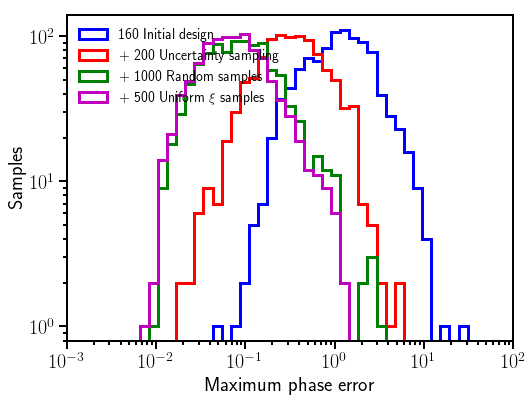

In [41]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.hist(errors_lhd[:, 7], bins=np.logspace(-3, 2, 50), histtype='step', 
          ls='-', lw=3, color='blue', alpha=1.0, label=r'160 Initial design')
ax.hist(errors_uncsamp[:, 7], bins=np.logspace(-3, 2, 50), histtype='step', 
          ls='-', lw=3, color='red', alpha=1.0, label=r'+ 200 Uncertainty sampling')
ax.hist(errors_rand[:, 7], bins=np.logspace(-3, 2, 50), histtype='step', 
          ls='-', lw=3, color='green', alpha=1.0, label=r'+ 1000 Random samples')
ax.hist(errors_uniformxi[:, 7], bins=np.logspace(-3, 2, 50), histtype='step', 
          ls='-', lw=3, color='m', alpha=1.0, label=r'+ 500 Uniform $\xi$ samples')

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim([1.0e-3, 100.0])
ax.set_xlabel('Maximum phase error')
ax.set_ylabel('Samples')
ax.legend(loc='upper left', frameon=False)

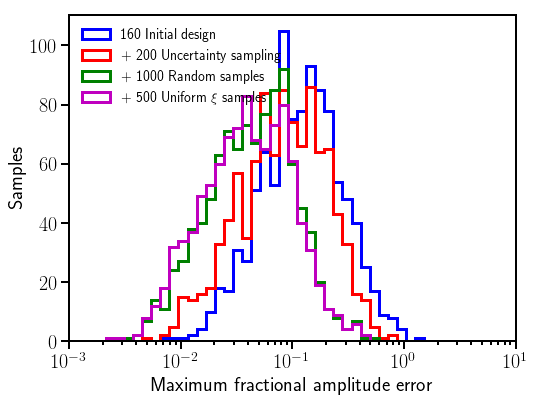

In [11]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.hist(errors_lhd[:, 6], bins=np.logspace(-3, 1, 50), histtype='step', 
          ls='-', lw=3, color='blue', alpha=1.0, label=r'160 Initial design')
ax.hist(errors_uncsamp[:, 6], bins=np.logspace(-3, 1, 50), histtype='step', 
          ls='-', lw=3, color='red', alpha=1.0, label=r'+ 200 Uncertainty sampling')
ax.hist(errors_rand[:, 6], bins=np.logspace(-3, 1, 50), histtype='step', 
          ls='-', lw=3, color='green', alpha=1.0, label=r'+ 1000 Random samples')
ax.hist(errors_uniformxi[:, 6], bins=np.logspace(-3, 1, 50), histtype='step', 
          ls='-', lw=3, color='m', alpha=1.0, label=r'+ 500 Uniform $\xi$ samples')

ax.set_xscale('log')
ax.set_xlim([1.0e-3, 10.0])
ax.set_xlabel('Maximum fractional amplitude error')
ax.set_ylabel('Samples')
ax.legend(loc='upper left', frameon=False)

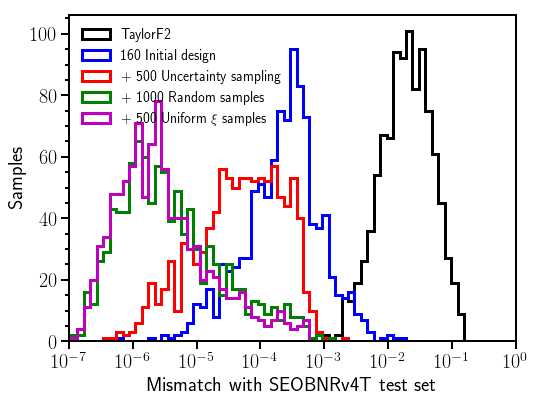

In [47]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.hist(errors_lhd[:, 9], bins=np.logspace(-10, 0, 100), histtype='step', 
          ls='-', lw=3, color='black', alpha=1.0, label=r'TaylorF2')

ax.hist(errors_lhd[:, 8], bins=np.logspace(-10, 0, 100), histtype='step', 
          ls='-', lw=3, color='blue', alpha=1.0, label=r'160 Initial design')
ax.hist(errors_uncsamp[:, 8], bins=np.logspace(-10, 0, 100), histtype='step', 
          ls='-', lw=3, color='red', alpha=1.0, label=r'+ 500 Uncertainty sampling')
ax.hist(errors_rand[:, 8], bins=np.logspace(-10, 0, 100), histtype='step', 
          ls='-', lw=3, color='green', alpha=1.0, label=r'+ 1000 Random samples')
ax.hist(errors_uniformxi[:, 8], bins=np.logspace(-10, 0, 100), histtype='step', 
          ls='-', lw=3, color='m', alpha=1.0, label=r'+ 500 Uniform $\xi$ samples')

ax.set_xscale('log')
#ax.set_yscale('log')
ax.set_xlim([1.0e-7, 1.0])
ax.set_xticks([1.0e-7, 1.0e-6, 1.0e-5, 1.0e-4, 1.0e-3, 1.0e-2, 1.0e-1, 1.0e0])
ax.minorticks_on()
ax.set_xlabel(r'Mismatch with SEOBNRv4T test set')
ax.set_ylabel('Samples')
ax.legend(loc='upper left', frameon=False)

# import matplotlib.ticker

# #ax.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
# #ax.xaxis.set_major_formatter(matplotlib.ticker.NullFormatter())

# locmaj = matplotlib.ticker.LogLocator(base=1.0e-7, subs=(1, 10, 10**2, 10**3, 10**4, 10**5, 10**6, 10**7))
# ax.xaxis.set_major_locator(locmaj)

# #locmin = matplotlib.ticker.LogLocator(base=1.0e-7, subs=(2, 3, 4, 5, 6, 7, 8, 9)) 
# locmin = matplotlib.ticker.LogLocator(base=1.0e-7, subs=np.arange(2, 10)*0.1) 
# ax.xaxis.set_minor_locator(locmin)


#fig.savefig('../../paper/mismatch.pdf', format='pdf', transparent=True, bbox_inches='tight')

In [13]:
# fig, ax = plt.subplots(figsize=(8, 6))

# # spin_max = 0.5
# # xs = errors_rand[
# #     (errors_rand[:, 1] >= -spin_max) & 
# #     (errors_rand[:, 1] <= spin_max) & 
# #     (errors_rand[:, 2] >= -spin_max) & 
# #     (errors_rand[:, 2] <= spin_max)][:, 8]

# tidal_max = 1000
# xs = errors_rand[
#     (errors_rand[:, 3] >= -tidal_max) & 
#     (errors_rand[:, 3] <= tidal_max) & 
#     (errors_rand[:, 4] >= -tidal_max) & 
#     (errors_rand[:, 4] <= tidal_max)][:, 8]

# print len(xs)

# ax.hist(xs, bins=np.logspace(-10, 0, 100), histtype='step', 
#           ls='-', lw=3, color='green', alpha=1.0, label=r'+ 1000 Random samples')

# ax.set_xscale('log')
# ax.set_xlim([1.0e-7, 1.0])
# ax.set_xlabel(r'Mismatch with SEOBNRv4T test set')
# ax.set_ylabel('Samples')
# ax.legend(loc='upper left', frameon=False)
# ax.set_xticks([1.0e-7, 1.0e-6, 1.0e-5, 1.0e-4, 1.0e-3, 1.0e-2, 1.0e-1, 1.0e0])
# #ax.xaxis.set_major_locator(loc)

# Sampled parameters

In [14]:
#trainset = ws.HDF5WaveformSet('../../data/TEOBv4QM_20hz/dh_train_corners_lhd.hdf5')
#trainset = ws.HDF5WaveformSet('../../data/TEOBv4QM_20hz/dh_train_lhd_uncsamp.hdf5')
#trainset = ws.HDF5WaveformSet('../../data/TEOBv4QM_20hz/dh_train_lhd_uncsamp_rand.hdf5')
trainset = ws.HDF5WaveformSet('../../data/TEOBv4QM_20hz/dh_train_lhd_uncsamp_rand_uniformxi.hdf5')
params_all = trainset.parameters()

In [15]:
len(params_all)

2159

In [16]:
params_lhd = params_all[:160]
params_uncsamp = params_all[160:659]
params_rand = params_all[659:]
len(params_lhd), len(params_uncsamp), len(params_rand)

(160, 499, 1500)

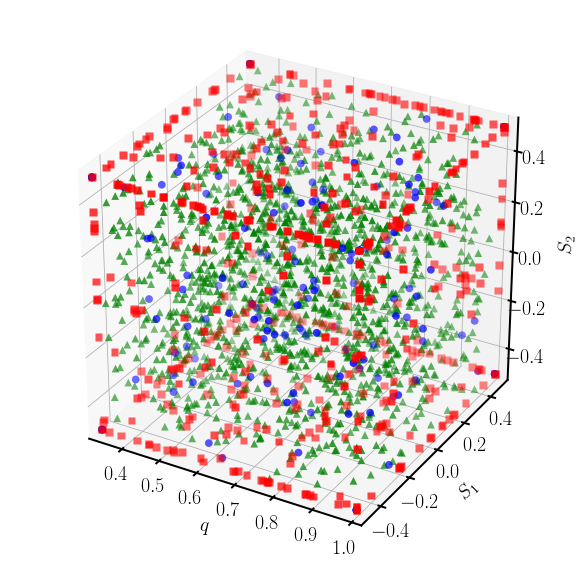

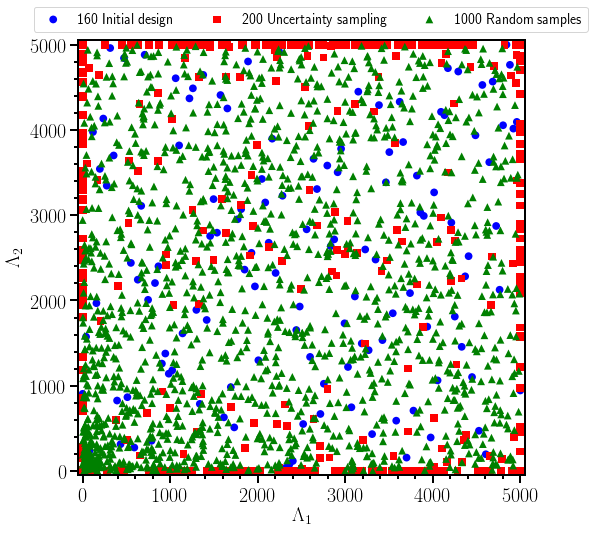

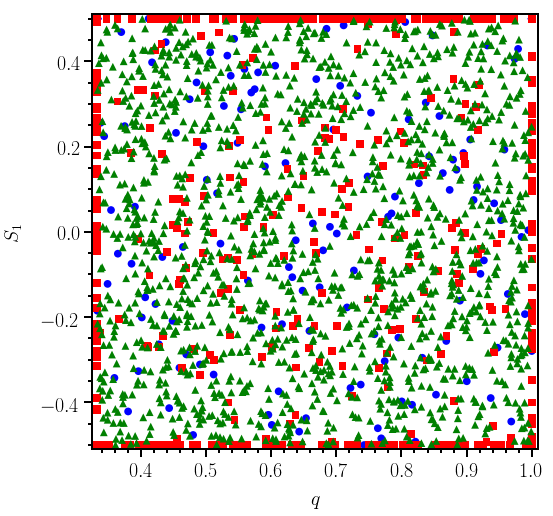

In [17]:
fig = plt.figure(figsize=(10, 10))
axes = fig.add_subplot(111, projection='3d')

x, y, z = params_lhd[:, 0], params_lhd[:, 1], params_lhd[:, 2]
axes.scatter(x, y, z, c='b', edgecolor='none', marker='o', s=60)

x, y, z = params_uncsamp[:, 0], params_uncsamp[:, 1], params_uncsamp[:, 2]
axes.scatter(x, y, z, c='r', edgecolor='none', marker='s', s=60)

x, y, z = params_rand[:, 0], params_rand[:, 1], params_rand[:, 2]
axes.scatter(x, y, z, c='g', edgecolor='none', marker='^', s=60)

axes.set_xlim(0.325, 1.01)
axes.set_ylim(-0.51, 0.51)
axes.set_zlim(-0.51, 0.51)
axes.set_xlabel('$q$', labelpad=10)
axes.set_ylabel('$S_1$', labelpad=15)
axes.set_zlabel('$S_2$', labelpad=18)
#fig.savefig('../../paper/trainingset3d.pdf', format='pdf', transparent=True, bbox_inches='tight')


fig, axes = plt.subplots(1, figsize=(8, 8))

x, y = params_lhd[:, 3], params_lhd[:, 4]
axes.scatter(x, y, c='b', edgecolor='none', marker='o', s=60, label='160 Initial design')

x, y = params_uncsamp[:, 3], params_uncsamp[:, 4]
axes.scatter(x, y, c='r', edgecolor='none', marker='s', s=60, label='200 Uncertainty sampling')

x, y = params_rand[:, 3], params_rand[:, 4]
axes.scatter(x, y, c='g', edgecolor='none', marker='^', s=60, label='1000 Random samples')

axes.set_xlim(-50, 5050)
axes.set_ylim(-50, 5050)
axes.set_xlabel('$\Lambda_1$')
axes.set_ylabel('$\Lambda_2$')
axes.minorticks_on()
axes.legend(ncol=3, loc=(-0.1, 1.02))
#fig.savefig('../../paper/trainingset2d.pdf', format='pdf', transparent=True, bbox_inches='tight')


fig, axes = plt.subplots(1, figsize=(8, 8))

x, y = params_lhd[:, 0], params_lhd[:, 1]
axes.scatter(x, y, c='b', edgecolor='none', marker='o', s=60)

x, y = params_uncsamp[:, 0], params_uncsamp[:, 1]
axes.scatter(x, y, c='r', edgecolor='none', marker='s', s=60)

x, y = params_rand[:, 0], params_rand[:, 1]
axes.scatter(x, y, c='g', edgecolor='none', marker='^', s=60)

axes.set_xlim(0.325, 1.01)
axes.set_ylim(-0.51, 0.51)
axes.set_xlabel('$q$', labelpad=10)
axes.set_ylabel('$S_1$', labelpad=15)
axes.minorticks_on()

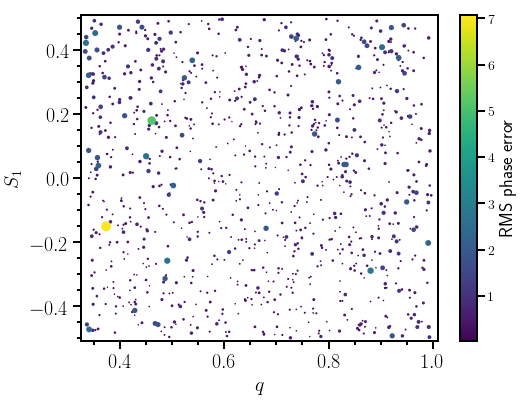

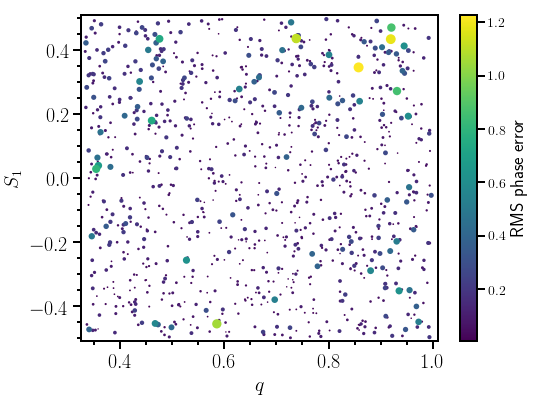

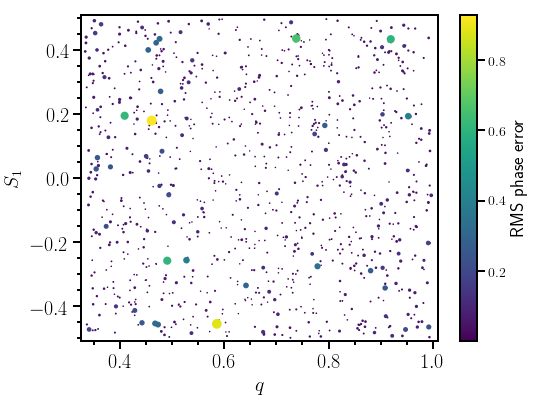

In [95]:
j = 5

threshold = None
x = errors_lhd[:, 0]
y = errors_lhd[:, 1]
error = errors_lhd[:, j]

fig, axes = plt.subplots(1, figsize=(8, 6))
diagnostics.max_error_2d_projection_plot(
    axes, x, y, error, threshold=threshold,
    x_label=r'$q$', y_label=r'$S_{1}$', colorbar=True, colorbarlabel='RMS phase error')
axes.set_xlim(0.325, 1.01)
axes.set_ylim(-0.51, 0.51)
axes.minorticks_on()


threshold = None
x = errors_uncsamp[:, 0]
y = errors_uncsamp[:, 1]
error = errors_uncsamp[:, j]

fig, axes = plt.subplots(1, figsize=(8, 6))
diagnostics.max_error_2d_projection_plot(
    axes, x, y, error, threshold=threshold,
    x_label=r'$q$', y_label=r'$S_{1}$', colorbar=True, colorbarlabel='RMS phase error')
axes.set_xlim(0.325, 1.01)
axes.set_ylim(-0.51, 0.51)
axes.minorticks_on()


threshold = None
x = errors_rand[:, 0]
y = errors_rand[:, 1]
error = errors_rand[:, j]

fig, axes = plt.subplots(1, figsize=(8, 6))
diagnostics.max_error_2d_projection_plot(
    axes, x, y, error, threshold=threshold,
    x_label=r'$q$', y_label=r'$S_{1}$', colorbar=True, colorbarlabel='RMS phase error')
axes.set_xlim(0.325, 1.01)
axes.set_ylim(-0.51, 0.51)
axes.minorticks_on()

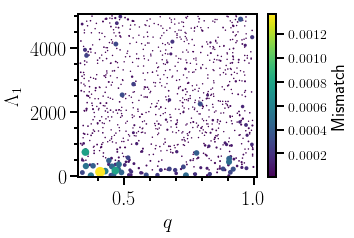

In [96]:
j = 8

threshold = None
x = errors_rand[:, 0]
y = errors_rand[:, 3]
error = errors_rand[:, j]

fig, axes = plt.subplots(1, figsize=(4, 3))
diagnostics.max_error_2d_projection_plot(
    axes, x, y, error, threshold=threshold,
    x_label=r'$q$', y_label=r'$\Lambda_1$', colorbar=True, colorbarlabel='Mismatch')
axes.set_xlim(0.325, 1.01)
axes.set_ylim(-50, 5050)
axes.minorticks_on()

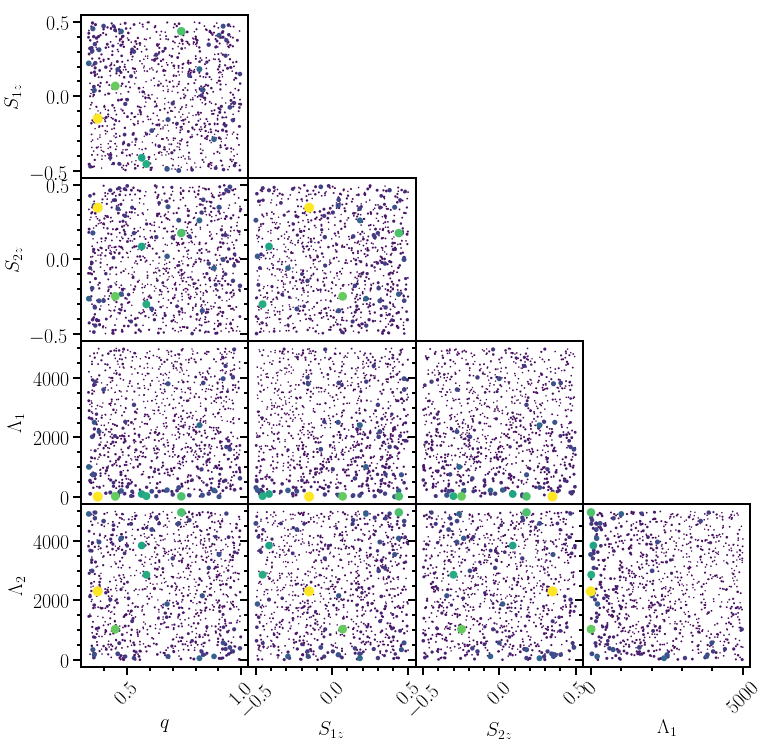

In [18]:
# SEOBNRv4T mismatch
j = 8

#threshold = 0.1
threshold = None

labels = [r'$q$', r'$S_{1z}$', r'$S_{2z}$', r'$\Lambda_1$', r'$\Lambda_2$']

params = errors_lhd[:, :5]
error = errors_lhd[:, j]
fig, ax = diagnostics.error_2d_triangle_plot(params, error, labels, threshold=threshold, figsize=(10, 10))

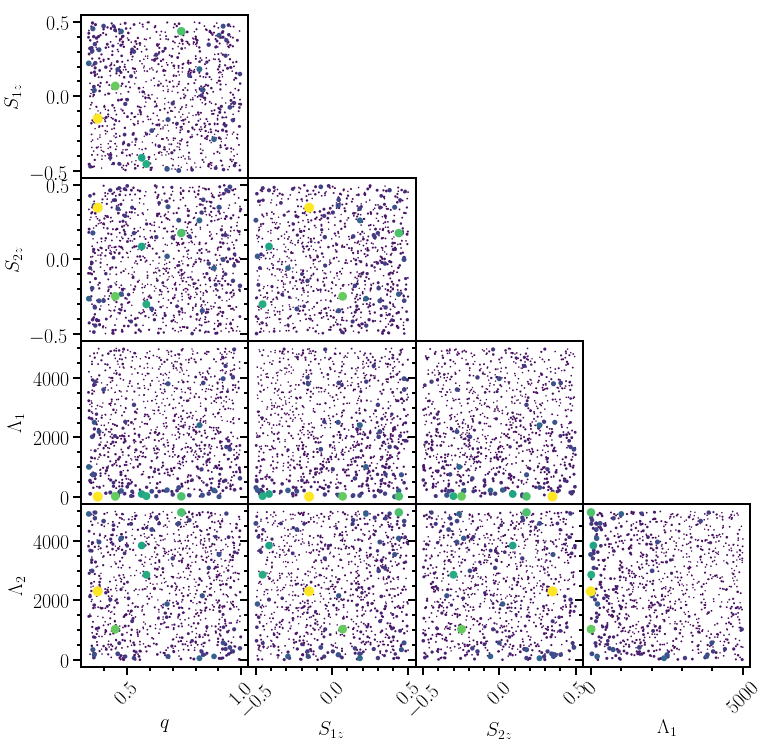

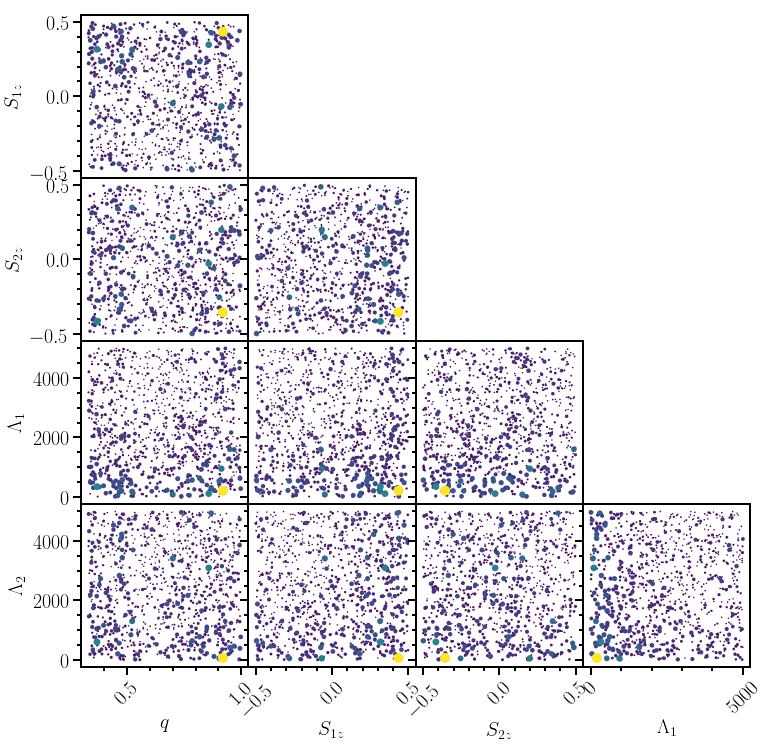

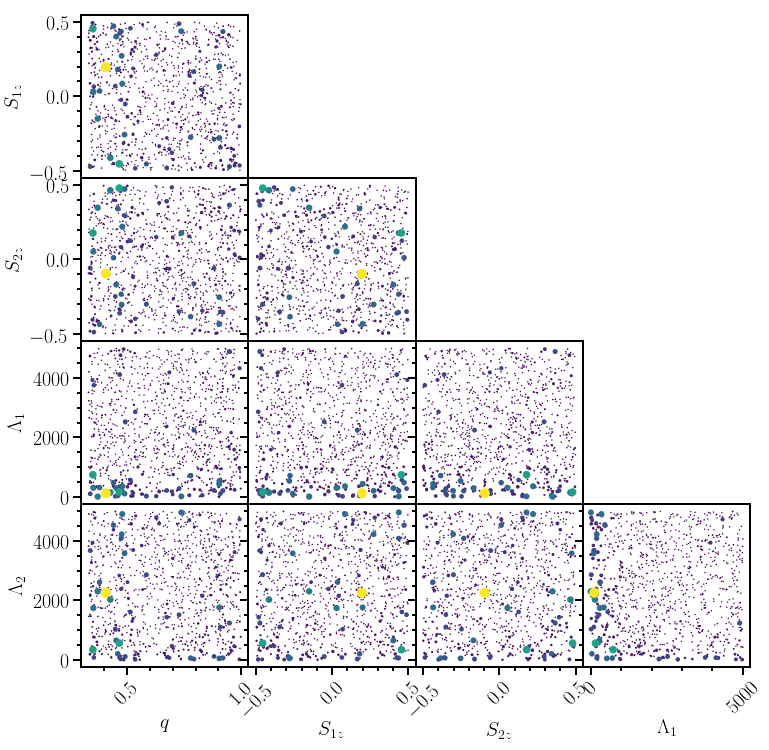

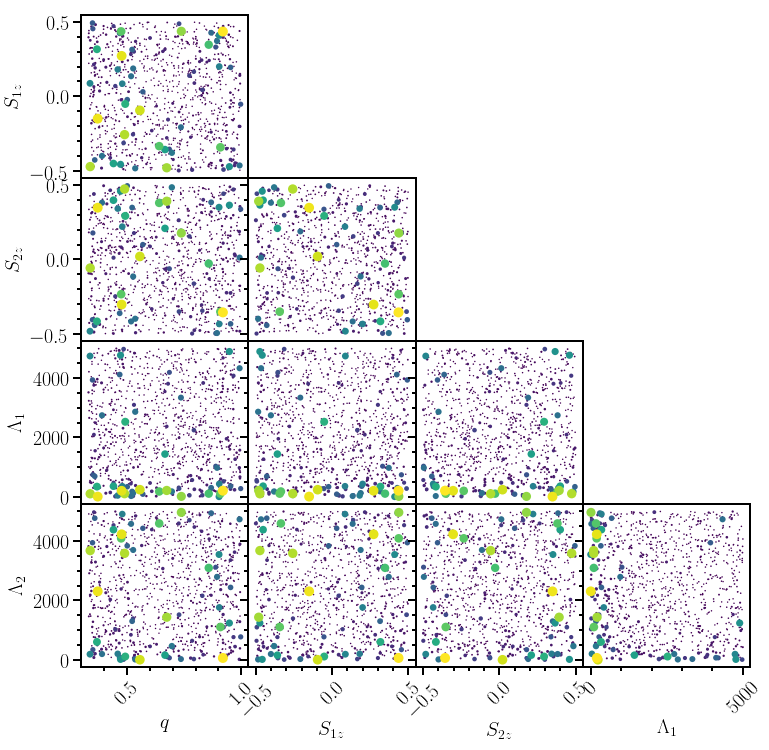

In [36]:
j = 8

#threshold = 0.1
threshold = None

labels = [r'$q$', r'$S_{1z}$', r'$S_{2z}$', r'$\Lambda_1$', r'$\Lambda_2$']

params = errors_lhd[:, :5]
error = errors_lhd[:, j]
fig, ax = diagnostics.error_2d_triangle_plot(params, error, labels, threshold=threshold, figsize=(10, 10))

params = errors_uncsamp[:, :5]
error = errors_uncsamp[:, j]
fig, ax = diagnostics.error_2d_triangle_plot(params, error, labels, threshold=threshold, figsize=(10, 10))

params = errors_rand[:, :5]
error = errors_rand[:, j]
fig, ax = diagnostics.error_2d_triangle_plot(params, error, labels, threshold=threshold, figsize=(10, 10))

params = errors_uniformxi[:, :5]
error = errors_uniformxi[:, j]
fig, ax = diagnostics.error_2d_triangle_plot(params, error, labels, threshold=threshold, figsize=(10, 10))

# RMS phase error

In [20]:
uncsamp_estimate = np.loadtxt('../../data/TEOBv4_20hz/uncsamp_from_lhd_trainset.txt')
uncsamp_estimate

array([[ 5.440167e-01, -5.000000e-01, -2.117563e-01,  0.000000e+00,  7.033711e+02,  7.102207e-01],
       [ 6.126817e-01,  5.000000e-01,  3.394377e-01,  5.000000e+03,  8.388219e-06,  6.700467e-01],
       [ 6.295087e-01, -4.512803e-01, -4.999989e-01,  5.000000e+03,  2.551060e+03,  6.964253e-01],
       ...,
       [ 8.770348e-01,  8.577709e-03, -4.999995e-01,  4.211650e+03,  2.825820e+03,  1.347777e-01],
       [ 8.613782e-01,  5.000000e-01,  5.000000e-01,  1.018173e+03,  4.126428e+03,  1.328267e-01],
       [ 9.343063e-01,  5.000000e-01,  5.000000e-01,  4.154278e+03,  4.999996e+03,  1.345836e-01]])

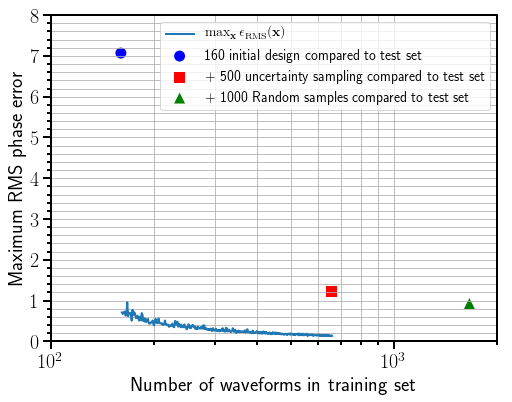

In [21]:
fig, axes = plt.subplots(1, figsize=(8, 6))

axes.plot(range(161, len(uncsamp_estimate)+161), uncsamp_estimate[:, 5], lw=2, label=r'$\max_{\bf x} \epsilon_{\rm RMS}({\bf x})$')

max_lhd = np.max(errors_lhd[:, 5])
axes.scatter(160, max_lhd, c='b', edgecolor='none', marker='o', s=120, label='160 initial design compared to test set')

max_uncsamp = np.max(errors_uncsamp[:, 5])
axes.scatter(659, max_uncsamp, c='r', edgecolor='none', marker='s', s=120, label='+ 500 uncertainty sampling compared to test set')

max_rand = np.max(errors_rand[:, 5])
axes.scatter(1659, max_rand, c='g', edgecolor='none', marker='^', s=120, label='+ 1000 Random samples compared to test set')

axes.set_xlabel('Number of waveforms in training set')
axes.set_ylabel('Maximum RMS phase error')
axes.set_xscale('log')
axes.minorticks_on()
axes.set_xlim(100, 2000)
axes.set_ylim(0, 8.0)
axes.grid(which='both')
# axes.grid(which='major')
# axes.grid(which='minor')
axes.legend(loc='upper right', frameon=True)

#fig.savefig('../../paper/uncertaintysampling.pdf', format='pdf', transparent=True, bbox_inches='tight')

## Initial surrogate

In [22]:
testset_rand = ws.HDF5WaveformSet('../../data/TEOBv4QM_20hz/h_test2.hdf5')
dtestset_rand = ws.HDF5WaveformSet('../../data/TEOBv4QM_20hz/dh_test2.hdf5')

In [23]:
nodes_filename = '../../data/TEOBv4QM_20hz/nodes_corners_lhd.hdf5'
gp_amp_filename = '../../data/TEOBv4QM_20hz/gp_spline_amp_corners_lhd.hdf5'
gp_phase_filename = '../../data/TEOBv4QM_20hz/gp_spline_phase_corners_lhd.hdf5'
sur_lhd = surrogate.GPSplineSurrogate.load(nodes_filename, gp_amp_filename, gp_phase_filename, 
                                       order=3, npoints=10000, quad1=None, quad2=None, spin_spin=False)

101
[ 3.734683e-01 -1.504915e-01  3.482337e-01  4.135736e+00  2.306321e+03  7.069778e+00  1.075748e-01
  2.458576e+01  1.598161e-02  7.018618e-03]


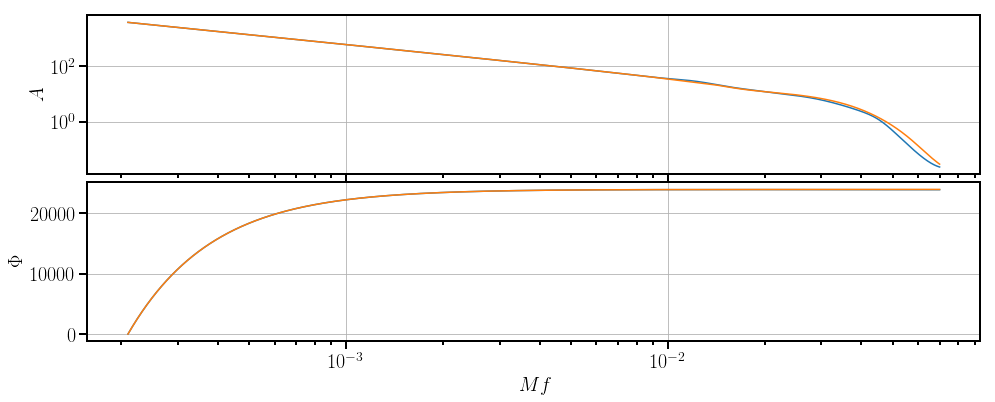

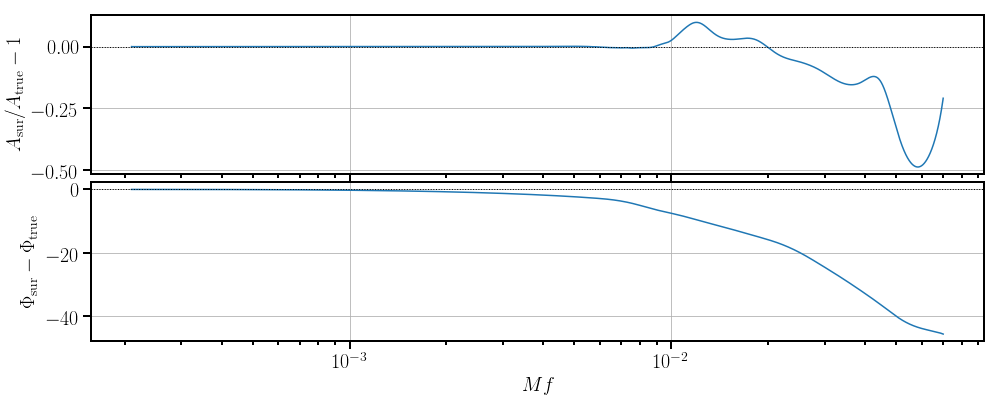

In [24]:
i = np.argmax(errors_lhd[:, 8])
print i
print errors_lhd[i]
params = testset_rand.get_waveform(i, data='parameters')
#print params

h_true = testset_rand[i]
h_sur_lhd = sur_lhd.geometric_waveform(params)
# Resample and zero starting phase
h_sur_lhd.resample(h_true.x)
h_sur_lhd.phase -= h_sur_lhd.phase[0]
    
# Plot h_true and h_sur
fig, (ax1, ax2) = wave.plot_waveforms_fd([h_sur_lhd, h_true])
ax1.set_yscale('log')
ax1.set_ylabel(r'$A$')
ax2.set_ylabel(r'$\Phi$')
ax2.set_xlabel(r'$Mf$')
ax1.grid()
ax2.grid()

# Plot error
fig, (ax1, ax2) = wave.plot_waveform_difference_fd(h_sur_lhd, h_true)
ax1.set_ylabel(r'$A_{\rm sur}/A_{\rm true} - 1$')
ax2.set_ylabel(r'$\Phi_{\rm sur} - \Phi_{\rm true}$')
ax2.set_xlabel(r'$Mf$')
ax1.grid()
ax2.grid()

## Uncertainty sampling surrogate

In [25]:
nodes_filename = '../../data/TEOBv4QM_20hz/nodes_lhd_uncsamp.hdf5'
gp_amp_filename = '../../data/TEOBv4QM_20hz/gp_spline_amp_lhd_uncsamp.hdf5'
gp_phase_filename = '../../data/TEOBv4QM_20hz/gp_spline_phase_lhd_uncsamp.hdf5'
sur_uncsamp = surrogate.GPSplineSurrogate.load(nodes_filename, gp_amp_filename, gp_phase_filename, 
                                       order=3, npoints=10000, quad1=None, quad2=None, spin_spin=False)

769
[ 9.193987e-01  4.349470e-01 -3.565914e-01  2.048164e+02  6.039330e+01  1.187266e+00  3.129410e-02
  4.956547e+00  2.110451e-03  1.353509e-02]


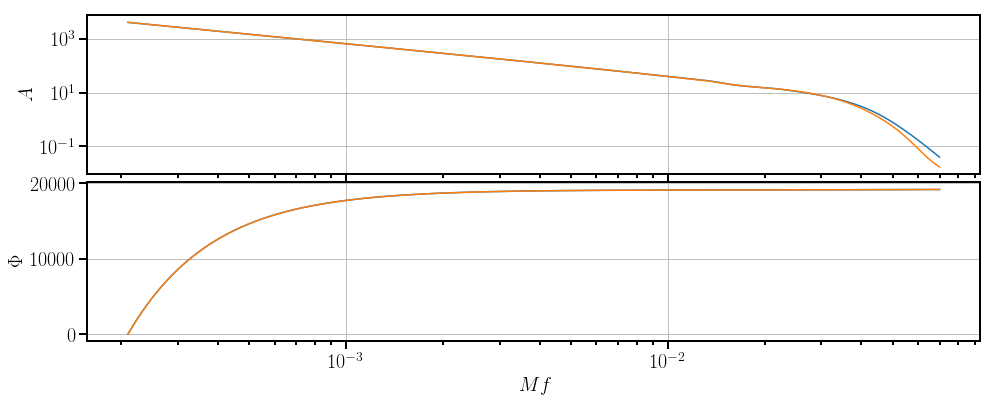

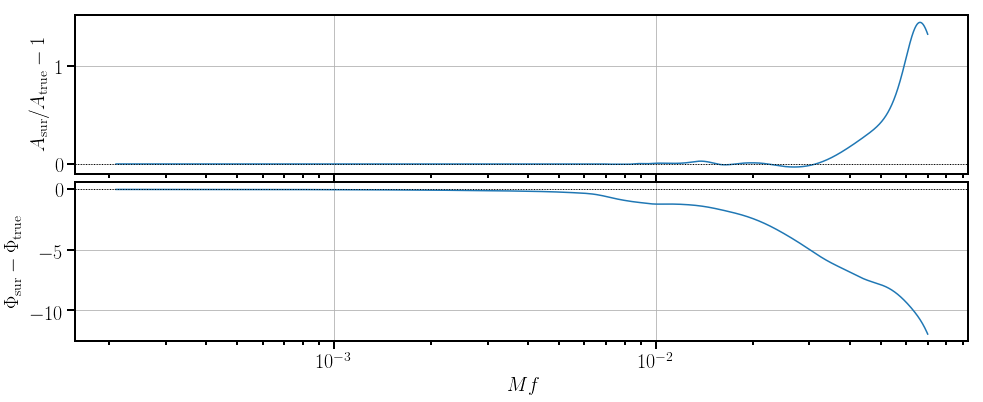

In [26]:
i = np.argmax(errors_uncsamp[:, 8])
print i
print errors_uncsamp[i]
params = testset_rand.get_waveform(i, data='parameters')
#print params

h_true = testset_rand[i]
h_sur_uncsamp = sur_uncsamp.geometric_waveform(params)
# Resample and zero starting phase
h_sur_uncsamp.resample(h_true.x)
h_sur_uncsamp.phase -= h_sur_uncsamp.phase[0]

# Plot h_true and h_sur
fig, (ax1, ax2) = wave.plot_waveforms_fd([h_sur_uncsamp, h_true])
ax1.set_yscale('log')
ax1.set_ylabel(r'$A$')
ax2.set_ylabel(r'$\Phi$')
ax2.set_xlabel(r'$Mf$')
ax1.grid()
ax2.grid()

# Plot error
fig, (ax1, ax2) = wave.plot_waveform_difference_fd(h_sur_uncsamp, h_true)
ax1.set_ylabel(r'$A_{\rm sur}/A_{\rm true} - 1$')
ax2.set_ylabel(r'$\Phi_{\rm sur} - \Phi_{\rm true}$')
ax2.set_xlabel(r'$Mf$')
ax1.grid()
ax2.grid()

## Random sampling surrogate

In [27]:
nodes_filename = '../../data/TEOBv4QM_20hz/nodes_lhd_uncsamp_rand.hdf5'
gp_amp_filename = '../../data/TEOBv4QM_20hz/gp_spline_amp_lhd_uncsamp_rand.hdf5'
gp_phase_filename = '../../data/TEOBv4QM_20hz/gp_spline_phase_lhd_uncsamp_rand.hdf5'
sur_rand = surrogate.GPSplineSurrogate.load(nodes_filename, gp_amp_filename, gp_phase_filename, 
                                       order=3, npoints=10000, quad1=None, quad2=None, spin_spin=False)

981
[ 4.089226e-01  1.954389e-01 -9.601926e-02  1.186250e+02  2.258960e+03  6.183873e-01  6.508861e-02
  2.730604e+00  1.364699e-03  2.002227e-02]


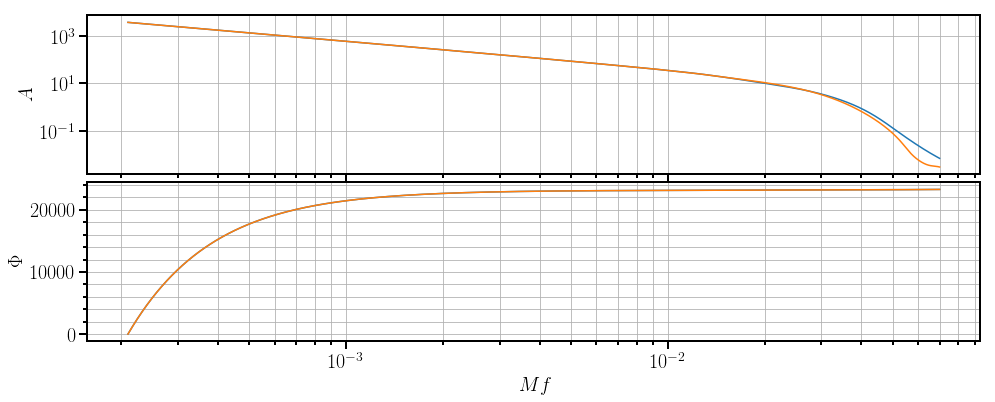

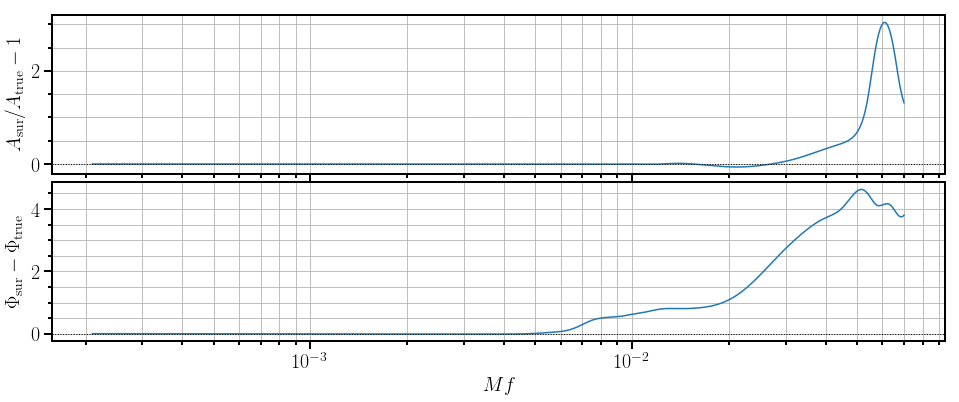

In [28]:
i = np.argmax(errors_rand[:, 8])
print i
print errors_rand[i]
params = testset_rand.get_waveform(i, data='parameters')
#print params

h_true = testset_rand[i]
h_sur_rand = sur_rand.geometric_waveform(params)
# Resample and zero starting phase
h_sur_rand.resample(h_true.x)
h_sur_rand.phase -= h_sur_rand.phase[0]

# Plot h_true and h_sur
fig, (ax1, ax2) = wave.plot_waveforms_fd([h_sur_rand, h_true])
ax1.set_yscale('log')
ax1.set_ylabel(r'$A$')
ax2.set_ylabel(r'$\Phi$')
ax2.set_xlabel(r'$Mf$')
ax1.minorticks_on()
ax2.minorticks_on()
ax1.grid(axis='both', which='both')
ax2.grid(axis='both', which='both')

# Plot error
fig, (ax1, ax2) = wave.plot_waveform_difference_fd(h_sur_rand, h_true)
ax1.set_ylabel(r'$A_{\rm sur}/A_{\rm true} - 1$')
ax2.set_ylabel(r'$\Phi_{\rm sur} - \Phi_{\rm true}$')
ax2.set_xlabel(r'$Mf$')
ax1.minorticks_on()
ax2.minorticks_on()
ax1.grid(axis='both', which='both')
ax2.grid(axis='both', which='both')

## uniform xi surrogate

In [29]:
nodes_filename = '../../data/TEOBv4QM_20hz/nodes_lhd_uncsamp_rand_uniformxi.hdf5'
gp_amp_filename = '../../data/TEOBv4QM_20hz/gp_spline_amp_lhd_uncsamp_rand_uniformxi.hdf5'
gp_phase_filename = '../../data/TEOBv4QM_20hz/gp_spline_phase_lhd_uncsamp_rand_uniformxi.hdf5'
sur_uniformxi = surrogate.GPSplineSurrogate.load(nodes_filename, gp_amp_filename, gp_phase_filename, 
                                       order=3, npoints=10000, quad1=None, quad2=None, spin_spin=False)

769
[ 9.193987e-01  4.349470e-01 -3.565914e-01  2.048164e+02  6.039330e+01  6.035832e-01  3.720021e-02
  2.677562e+00  3.398787e-04  1.353509e-02]


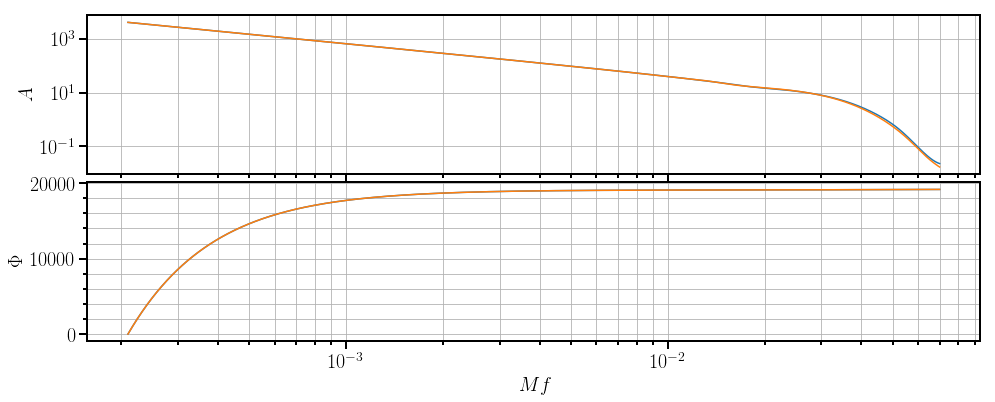

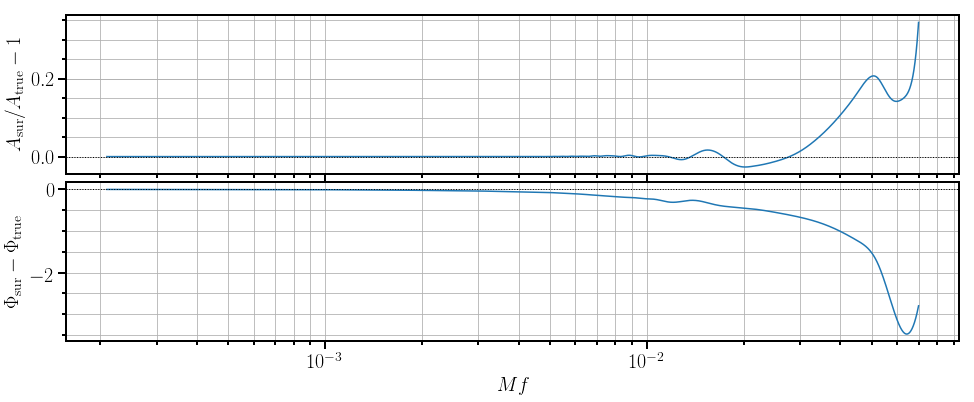

In [31]:
i = np.argmax(errors_uniformxi[:, 8])
print i
print errors_rand[i]
params = testset_rand.get_waveform(i, data='parameters')
#print params

h_true = testset_rand[i]
h_sur_uniformxi = sur_uniformxi.geometric_waveform(params)
# Resample and zero starting phase
h_sur_uniformxi.resample(h_true.x)
h_sur_uniformxi.phase -= h_sur_uniformxi.phase[0]

# Plot h_true and h_sur
fig, (ax1, ax2) = wave.plot_waveforms_fd([h_sur_uniformxi, h_true])
ax1.set_yscale('log')
ax1.set_ylabel(r'$A$')
ax2.set_ylabel(r'$\Phi$')
ax2.set_xlabel(r'$Mf$')
ax1.minorticks_on()
ax2.minorticks_on()
ax1.grid(axis='both', which='both')
ax2.grid(axis='both', which='both')

# Plot error
fig, (ax1, ax2) = wave.plot_waveform_difference_fd(h_sur_uniformxi, h_true)
ax1.set_ylabel(r'$A_{\rm sur}/A_{\rm true} - 1$')
ax2.set_ylabel(r'$\Phi_{\rm sur} - \Phi_{\rm true}$')
ax2.set_xlabel(r'$Mf$')
ax1.minorticks_on()
ax2.minorticks_on()
ax1.grid(axis='both', which='both')
ax2.grid(axis='both', which='both')

In [118]:
# i = np.argmax(errors_rand[:, 8])
# print i
# print errors_rand[i]
# params = dtestset_rand.get_waveform(i, data='parameters')

# dh_true = dtestset_rand[i]
# dh_sur_rand = sur_rand.amp_phase_difference(params)

# # Resample and zero starting phase
# dh_sur_rand.resample(h_true.x)
# #h_sur_rand.phase -= h_sur_rand.phase[0]

# # Plot h_true and h_sur
# fig, (ax1, ax2) = wave.plot_waveforms_fd([dh_sur_rand, dh_true])
# #ax1.set_yscale('log')
# ax1.set_ylabel(r'$(\Delta\ln A)_{\rm true} - (\Delta\ln A)_{\rm sur}$')
# ax2.set_ylabel(r'$\Delta\Phi_{\rm true} - \Delta\Phi_{\rm sur}$')
# ax2.set_xlabel(r'$Mf$')
# ax1.minorticks_on()
# ax2.minorticks_on()
# ax1.grid(axis='both', which='both')
# ax2.grid(axis='both', which='both')

## Combine the 3 errors

[ 3.734683e-01 -1.504915e-01  3.482337e-01  4.135736e+00  2.306321e+03]
[  0.919399   0.434947  -0.356591 204.8164    60.393296]
[ 4.089226e-01  1.954389e-01 -9.601926e-02  1.186250e+02  2.258960e+03]
[  0.919399   0.434947  -0.356591 204.8164    60.393296]


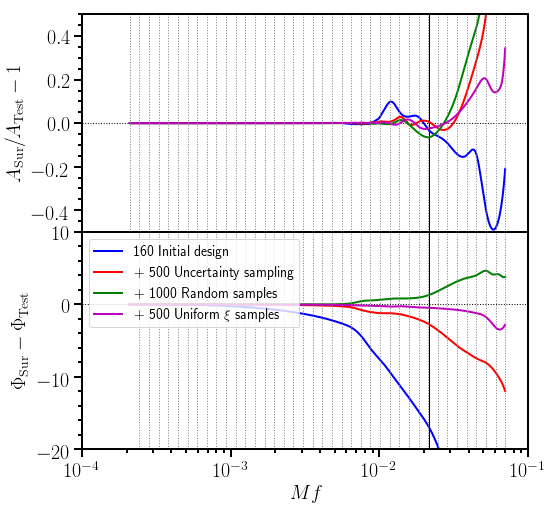

In [34]:
# Column for the error quantity
j = 8

npoints = 10000
fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(8, 8))
fig.subplots_adjust(wspace=0, hspace=0)

ax1.axhline(0, ls=':', c='k', lw=1)
ax2.axhline(0, ls=':', c='k', lw=1)

ax1.axvline(MF_ISCO, ls='-', c='k', lw=1)
ax2.axvline(MF_ISCO, ls='-', c='k', lw=1)

i = np.argmax(errors_lhd[:, j])
params = testset_rand.get_waveform(i, data='parameters')
print params
h_true = testset_rand[i]
h_sur = sur_lhd.geometric_waveform(params)
# Resample and zero starting phase
h_sur.resample(h_true.x)
h_sur.phase -= h_sur.phase[0]
amp_ratio = wave.waveform_amplitude_ratio(h_sur, h_true, npoints=npoints, spacing='log')
phi_diff = wave.waveform_phase_difference(h_sur, h_true, npoints=npoints, spacing='log')
ax1.plot(amp_ratio.x, amp_ratio.amp-1.0, lw=2, c='b')
ax2.plot(phi_diff.x, phi_diff.phase, lw=2, c='b', label='160 Initial design')

i = np.argmax(errors_uncsamp[:, j])
params = testset_rand.get_waveform(i, data='parameters')
print params
h_true = testset_rand[i]
h_sur = sur_uncsamp.geometric_waveform(params)
# Resample and zero starting phase
h_sur.resample(h_true.x)
h_sur.phase -= h_sur.phase[0]
amp_ratio = wave.waveform_amplitude_ratio(h_sur, h_true, npoints=npoints, spacing='log')
phi_diff = wave.waveform_phase_difference(h_sur, h_true, npoints=npoints, spacing='log')
ax1.plot(amp_ratio.x, amp_ratio.amp-1.0, lw=2, c='r')
ax2.plot(phi_diff.x, phi_diff.phase, lw=2, c='r', label='+ 500 Uncertainty sampling')

i = np.argmax(errors_rand[:, j])
params = testset_rand.get_waveform(i, data='parameters')
print params
h_true = testset_rand[i]
h_sur = sur_rand.geometric_waveform(params)
# Resample and zero starting phase
h_sur.resample(h_true.x)
h_sur.phase -= h_sur.phase[0]
amp_ratio = wave.waveform_amplitude_ratio(h_sur, h_true, npoints=npoints, spacing='log')
phi_diff = wave.waveform_phase_difference(h_sur, h_true, npoints=npoints, spacing='log')
ax1.plot(amp_ratio.x, amp_ratio.amp-1.0, lw=2, c='g')
ax2.plot(phi_diff.x, phi_diff.phase, lw=2, c='g', label='+ 1000 Random samples')

i = np.argmax(errors_uniformxi[:, j])
params = testset_rand.get_waveform(i, data='parameters')
print params
h_true = testset_rand[i]
h_sur = sur_uniformxi.geometric_waveform(params)
# Resample and zero starting phase
h_sur.resample(h_true.x)
h_sur.phase -= h_sur.phase[0]
amp_ratio = wave.waveform_amplitude_ratio(h_sur, h_true, npoints=npoints, spacing='log')
phi_diff = wave.waveform_phase_difference(h_sur, h_true, npoints=npoints, spacing='log')
ax1.plot(amp_ratio.x, amp_ratio.amp-1.0, lw=2, c='m')
ax2.plot(phi_diff.x, phi_diff.phase, lw=2, c='m', label=r'+ 500 Uniform $\xi$ samples')

for mf in sur_lhd.mf_amp:
    ax1.axvline(mf, c='gray', ls=':', lw=1)

for mf in sur_lhd.mf_phase:
    ax2.axvline(mf, c='gray', ls=':', lw=1)
    
ax1.set_xlim(0.0001, 0.1)
ax1.set_ylim(-0.5, 0.5)
ax2.set_ylim(-20, 10)

ax1.set_xscale('log')
ax2.set_xscale('log')
# ax1.set_yscale('symlog')
# ax2.set_yscale('symlog')
ax1.minorticks_on()
ax2.minorticks_on()

ax1.set_ylabel(r'$A_{\rm Sur}/A_{\rm Test} - 1$')
ax2.set_ylabel(r'$\Phi_{\rm Sur} - \Phi_{\rm Test}$')
ax2.set_xlabel(r'$Mf$')
#ax1.grid(axis='both', which='both')
#ax2.grid(axis='both', which='both')
ax2.legend(loc='upper left')

#fig.savefig('../../paper/htildemaxerror.pdf', format='pdf', transparent=True, bbox_inches='tight')

# Frequency-domain waveform and residuals 

In [43]:
h_train = ws.HDF5WaveformSet('../../data/TEOBv4QM_20hz/h_train_corners_lhd.hdf5')
dh_train = ws.HDF5WaveformSet('../../data/TEOBv4QM_20hz/dh_train_corners_lhd.hdf5')

dh_train.parameters().shape

(160, 5)

In [42]:
# nodes_filename = '../../data/TEOBv4QM_20hz/nodes_corners_lhd.hdf5'
# gp_amp_filename = '../../data/TEOBv4QM_20hz/gp_spline_amp_corners_lhd.hdf5'
# gp_phase_filename = '../../data/TEOBv4QM_20hz/gp_spline_phase_corners_lhd.hdf5'
# sur = surrogate.GPSplineSurrogate.load(
#     nodes_filename, gp_amp_filename, gp_phase_filename, 
#     order=3, npoints=10000, quad1=None, quad2=None, spin_spin=False)

# nodes_filename = '../../data/TEOBv4QM_20hz/nodes_lhd_uncsamp.hdf5'
# gp_amp_filename = '../../data/TEOBv4QM_20hz/gp_spline_amp_lhd_uncsamp.hdf5'
# gp_phase_filename = '../../data/TEOBv4QM_20hz/gp_spline_phase_lhd_uncsamp.hdf5'
# sur = surrogate.GPSplineSurrogate.load(
#     nodes_filename, gp_amp_filename, gp_phase_filename, 
#     order=3, npoints=10000, quad1=None, quad2=None, spin_spin=False)

# nodes_filename = '../../data/TEOBv4QM_20hz/nodes_lhd_uncsamp_rand.hdf5'
# gp_amp_filename = '../../data/TEOBv4QM_20hz/gp_spline_amp_lhd_uncsamp_rand.hdf5'
# gp_phase_filename = '../../data/TEOBv4QM_20hz/gp_spline_phase_lhd_uncsamp_rand.hdf5'
# sur = surrogate.GPSplineSurrogate.load(
#     nodes_filename, gp_amp_filename, gp_phase_filename, 
#     order=3, npoints=10000, quad1=None, quad2=None, spin_spin=False)

nodes_filename = '../../data/TEOBv4QM_20hz/nodes_lhd_uncsamp_rand_uniformxi.hdf5'
gp_amp_filename = '../../data/TEOBv4QM_20hz/gp_spline_amp_lhd_uncsamp_rand_uniformxi.hdf5'
gp_phase_filename = '../../data/TEOBv4QM_20hz/gp_spline_phase_lhd_uncsamp_rand_uniformxi.hdf5'
sur = surrogate.GPSplineSurrogate.load(
    nodes_filename, gp_amp_filename, gp_phase_filename, 
    order=3, npoints=10000, quad1=None, quad2=None, spin_spin=False)

(-1500, 500)

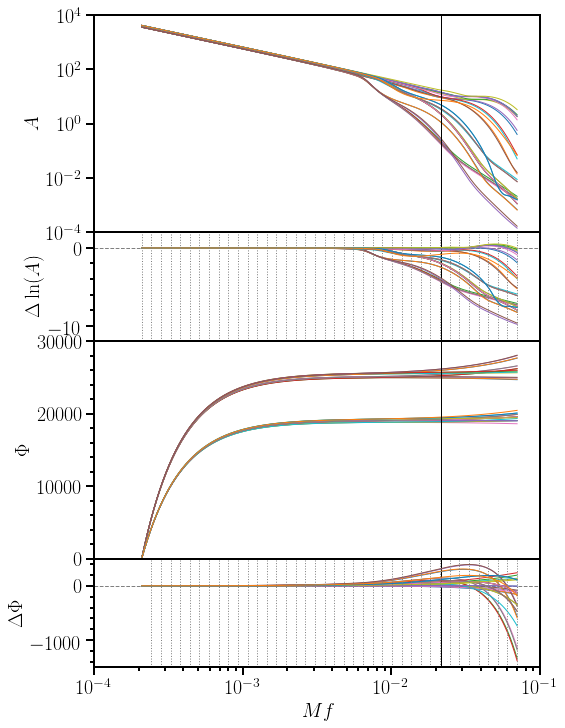

In [44]:
# Use the first 32 waveforms which are at the 32 corners of parameter space
nwave = 32

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, sharex=True, figsize=(8, 12), 
                                         gridspec_kw={'height_ratios':[1, 0.5, 1, 0.5]})
fig.subplots_adjust(wspace=0, hspace=0)


for i in range(nwave):
    h = h_train[i]
    #ax1.plot(h.x, h.amp, c='k', lw=1)
    ax1.plot(h.x, h.amp, lw=1)

ax1.axvline(MF_ISCO, c='k', lw=1)
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_ylabel(r'$A$')
ax1.minorticks_on()
ax1.set_xlim(1.0e-4, 1.0e-1)
ax1.set_ylim(1.0e-4, 1.0e4)


ax2.axhline(0, c='gray', ls='--', lw=1)
ax2.axvline(MF_ISCO, c='k', lw=1)

for i in range(nwave):
    dh = dh_train[i]
    #ax2.plot(dh.x, dh.amp, c='k', lw=1)
    ax2.plot(dh.x, dh.amp, lw=1)
    
for mf in sur.mf_amp:
    ax2.axvline(mf, c='gray', ls=':', lw=1)

ax2.set_xscale('log')
ax2.set_ylabel(r'$\Delta\ln(A)$')
ax2.minorticks_on()
ax2.set_ylim(-12, 2)


for i in range(nwave):
    h = h_train[i]
    #ax3.plot(h.x, h.phase, c='k', lw=1)
    ax3.plot(h.x, h.phase, lw=1)

ax3.axvline(MF_ISCO, c='k', lw=1)
ax3.set_xscale('log')
ax3.set_ylabel(r'$\Phi$')
ax3.minorticks_on()
ax3.set_ylim(0, 30000)

ax4.axhline(0, c='gray', ls='--', lw=1)
ax4.axvline(MF_ISCO, c='k', lw=1)

for i in range(nwave):
    dh = dh_train[i]
    #ax4.plot(dh.x, dh.phase, c='k', lw=1)
    ax4.plot(dh.x, dh.phase, lw=1)

for mf in sur.mf_phase:
    ax4.axvline(mf, c='gray', ls=':', lw=1)

ax4.set_xscale('log')
ax4.set_xlabel(r'$Mf$')
ax4.set_ylabel(r'$\Delta\Phi$')
ax4.minorticks_on()
ax4.set_ylim(-1500, 500)
#ax4.set_ylim(-500, 500)

#fig.savefig('../../paper/hoff.pdf', format='pdf', transparent=True, bbox_inches='tight')

In [45]:
h_test = ws.HDF5WaveformSet('../../data/TEOBv4QM_20hz/h_test1d_S1.hdf5')
dh_test = ws.HDF5WaveformSet('../../data/TEOBv4QM_20hz/dh_test1d_S1.hdf5')

print h_test.parameters().shape
print dh_test.parameters().shape

(51, 5)
(51, 5)


[ 6.e-01 -5.e-01  2.e-01  2.e+03  1.e+03]


/Users/lackey/Library/Python/2.7/lib/python/site-packages/sklearn/gaussian_process/gpr.py:308: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


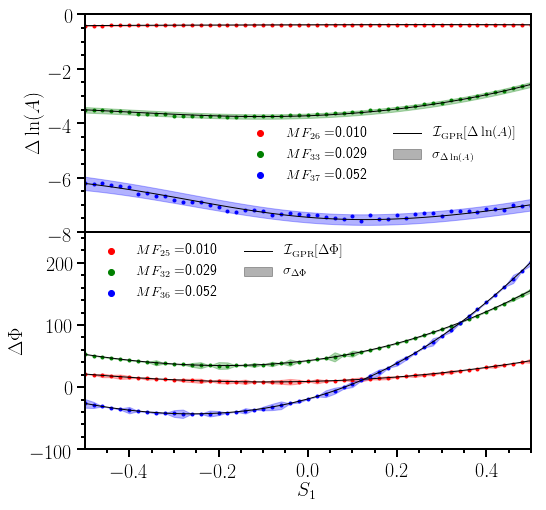

In [46]:
params = dh_test.parameters()
nwave = len(params)
print params[0]

# Do coordinate transformation
def xi_of_lam(lam, a=100):
    return np.log10(lam/a + 1)
lam1 = params[:, 3]
lam2 = params[:, 4]
xi1 = xi_of_lam(lam1)
xi2 = xi_of_lam(lam2)
params[:, 3] = xi1
params[:, 4] = xi2


fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8))
fig.subplots_adjust(wspace=0, hspace=0)

for j, c in zip([26, 33, 37], ['r', 'g', 'b']):
    # Node frequency
    mf = sur.mf_amp[j]
    
    # Values at node mf for test set and GP prediction/error
    damp_test = np.array([dh_test[i].interpolate('amp')(mf) for i in range(nwave)])
    damp_gp = sur.damp_gp_list[j]
    damp_gp_eval, damp_gp_eval_err = damp_gp.predict(params, return_std=True)
    
    # Double {{}} is needed to treat {} literally as a latex expression. The inner {} is used for .format()
    # The spin parameter S_1
    p = params[:, 1]
    ax1.plot(p, damp_test, c=c, ls='', marker='o', ms=3, label=r'$MF_{{{}}}=${:.3f}'.format(j, mf))
    ax1.plot(p, damp_gp_eval, ls='-', lw=1, c='k')
    ax1.fill_between(p, damp_gp_eval-damp_gp_eval_err, damp_gp_eval+damp_gp_eval_err, color=c, alpha=0.3)

ax1.plot(0, 0, ls='-', lw=1, c='k', label=r'$\mathcal{I}_{\rm GPR}[\Delta\ln(A)]$')
ax1.fill_between([0], [0], [0], color='k', alpha=0.3, label=r'$\sigma_{\Delta\ln(A)}$')
ax1.minorticks_on()
#ax1.grid(which='both')
ax1.set_xlim(-0.5, 0.5)
ax1.set_ylim(-8, 0)
ax1.set_ylabel(r'$\Delta\ln(A)$')
ax1.legend(ncol=2, loc=(0.35, 0.2), markerscale=2, frameon=False)
ax1.xaxis.set_ticklabels([])

for j, c in zip([25, 32, 36], ['r', 'g', 'b']):
    # Node frequency
    mf = sur.mf_phase[j]
    
    # Values at node mf for test set and GP prediction/error
    dphase_test = np.array([dh_test[i].interpolate('phase')(mf) for i in range(nwave)])
    dphase_gp = sur.dphase_gp_list[j]
    dphase_gp_eval, dphase_gp_eval_err = dphase_gp.predict(params, return_std=True)
    
    p = params[:, 1]
    ax2.plot(p, dphase_test, c=c, ls='', marker='o', ms=3, label=r'$MF_{{{}}}=${:.3f}'.format(j, mf))
    ax2.plot(p, dphase_gp_eval, ls='-', lw=1, c='k')
    ax2.fill_between(p, dphase_gp_eval-dphase_gp_eval_err, dphase_gp_eval+dphase_gp_eval_err, color=c, alpha=0.3)

ax2.plot(0, 0, ls='-', lw=1, c='k', label=r'$\mathcal{I}_{\rm GPR}[\Delta\Phi]$')
ax2.fill_between([0], [0], [0], color='k', alpha=0.3, label=r'$\sigma_{\Delta\Phi}$')
ax2.minorticks_on()
#ax2.grid(which='both')
ax2.set_xlim(-0.5, 0.5)
ax2.set_ylim(-100, 250)
ax2.set_ylabel(r'$\Delta\Phi$')
ax2.set_xlabel(r'$S_1$')
ax2.legend(ncol=2, loc='upper left', markerscale=2, frameon=False)

#fig.savefig('../../paper/dhofs.pdf', format='pdf', transparent=True, bbox_inches='tight')

In [223]:
import gaussianprocessregression as gpr

def print_hyperparameters(gp):
    hp = gpr.get_hyperparameters(gp)
    sigma_f = hp[0]
    sigma_n = hp[6]
    ymin = np.min(gp.y_train_)
    ymax = np.max(gp.y_train_)
    print ymin, ymax, sigma_f/(ymax-ymin), sigma_n/(ymax-ymin)
    #print dphase_gp.kernel_
    print 'sigma_f={:.3f}, sigma_n={:.7f}'.format(sigma_f, sigma_n)
    print '[l_q, l_s1, l_s2, l_lam1, l_lam2] = [{:.3f}, {:.3f}, {:.3f}, {:.0f}, {:.0f}]'.format(
    hp[1], hp[2], hp[3], hp[4], hp[5])

0.0010809372401678102
-0.010866858015129181 4.33148202068846 1.2160960418691906 0.004989934239571858
sigma_f=5.281, sigma_n=0.0216680
[l_q, l_s1, l_s2, l_lam1, l_lam2] = [0.690, 0.746, 1.673, 4148, 15260]


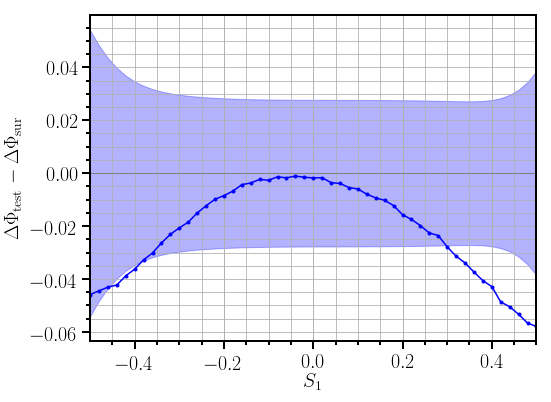

In [224]:
params = dh_test.parameters()
nwave = len(params)

# Get node frequency
#j = 32
j = 10
mf = sur.mf_phase[j]

print mf
print_hyperparameters(dphase_gp)

# Values at node mf for test set and GP prediction/error
dphase_test = np.array([dh_test[i].interpolate('phase')(mf) for i in range(nwave)])
dphase_gp = sur.dphase_gp_list[j]
dphase_gp_eval, dphase_gp_eval_err = dphase_gp.predict(params, return_std=True)

# S_1 component of parameters
p = params[:, 1]

fig, ax = plt.subplots(figsize=(8, 6))
c='b'
ax.plot(p, dphase_test-dphase_gp_eval, c=c, ls='-', marker='o', ms=3)
ax.fill_between(p, -dphase_gp_eval_err, dphase_gp_eval_err, color=c, alpha=0.3)

ax.axhline(0, c='gray', ls='-', lw=1)

ax.set_xlim(-0.5, 0.5)
ax.set_ylabel(r'$\Delta\Phi_{\rm test} - \Delta\Phi_{\rm sur}$')
ax.set_xlabel(r'$S_1$')
ax.minorticks_on()
ax.grid(which='both')

0.028639329652981414
471**2 * RBF(length_scale=[0.64, 1.15, 2.17, 3.91e+03, 2.12e+04]) + WhiteKernel(noise_level=2)
-37.29403348016648 379.60968947859567 1.130621847470108 0.0033899785845123514
sigma_f=471.360, sigma_n=1.4132947
[l_q, l_s1, l_s2, l_lam1, l_lam2] = [0.640, 1.146, 2.166, 3905, 21171]


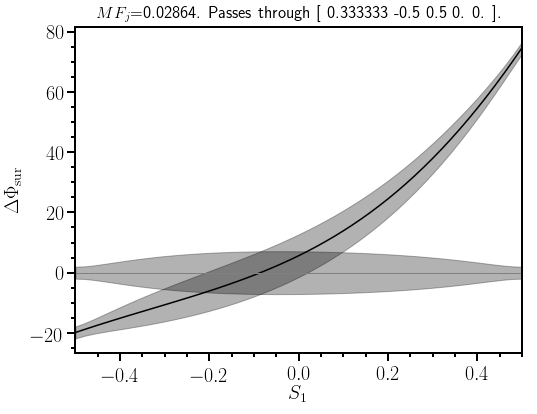

In [228]:
i = 4
#i = 100
point = dphase_gp.X_train_[i]
p = np.linspace(-0.5, 0.5, 51)
params = np.array([[point[0], s1, point[2], point[3], point[4]] for s1 in p])

# Get node frequency
#j = 32
j = 32
mf = sur.mf_phase[j]
print mf

# Values at node mf for test set and GP prediction/error
dphase_gp = sur.dphase_gp_list[j]
print dphase_gp.kernel_
print_hyperparameters(dphase_gp)
dphase_gp_eval, dphase_gp_eval_err = dphase_gp.predict(params, return_std=True)

# S_1 component of parameters
p = params[:, 1]

fig, ax = plt.subplots(figsize=(8, 6))
c='k'
ax.plot(p, dphase_gp_eval, c=c, ls='-', ms=3)
ax.fill_between(p, dphase_gp_eval-dphase_gp_eval_err, dphase_gp_eval+dphase_gp_eval_err, color=c, alpha=0.3)
ax.fill_between(p, -dphase_gp_eval_err, dphase_gp_eval_err, color=c, alpha=0.3)

ax.axhline(0, c='gray', ls='-', lw=1)
ax.set_title(r'$MF_j$={:.5f}. Passes through {}.'.format(mf, point))
ax.set_xlim(-0.5, 0.5)
ax.set_ylabel(r'$\Delta\Phi_{\rm sur}$')
ax.set_xlabel(r'$S_1$')
ax.minorticks_on()